# Polynomial Regression


## Import the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sohanjs111/Machine-Learning/main/Database/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [5]:
lin_reg.score(X,y)

0.6690412331929895

## Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) # specified order of the polynomialRegression (used degree of freedom)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) # Training the dataset

LinearRegression()

In [7]:
lin_reg_2.score(X_poly,y) # This is model accuracy

0.9973922891706614

## Visualising the Linear Regression results

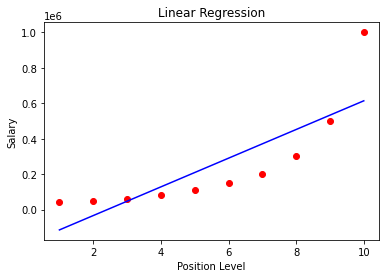

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title("Linear Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

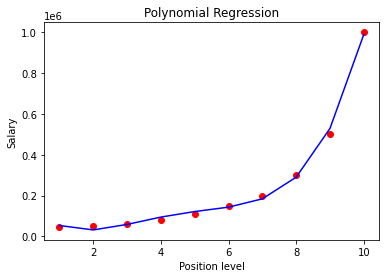

In [9]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

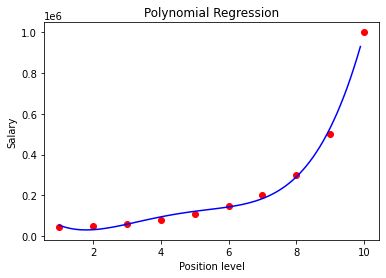

In [10]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with Linear Regression

In [11]:
lin_reg.predict([[6.5]])

array([330378.78787879])

### Predicting a new result with Polynomial Regression

In [12]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.4526516])